In [ ]:
!git clone https://github.com/Tayyab-Bilal/food-not-food.git

Cloning into 'food-not-food'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
!git clone https://github.com/mf1024/ImageNet-Datasets-Downloader.git

Cloning into 'ImageNet-Datasets-Downloader'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 124 (delta 3), reused 6 (delta 2), pack-reused 113
Receiving objects: 100% (124/124), 1.57 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
cd ImageNet-Datasets-Downloader/

/content/ImageNet-Datasets-Downloader


In [ ]:
!python ./downloader.py -data_root /content/food-not-food/Data -number_of_classes 1000 -images_per_class 50


Streaming output truncated to the last 5000 lines.
Scraping images for class "art school"
Multiprocessing workers: 8

Scraping stats:
STATS For class is_flickr:
 tried 5992.0 urls with 4690.0 successes
78.27102803738318% success rate for is_flickr urls 
0.05862884114800231 seconds spent per is_flickr succesful image download
STATS For class not_flickr:
 tried 0.0 urls with 0.0 successes
STATS For class all:
 tried 5992.0 urls with 4690.0 successes
78.27102803738318% success rate for all urls 
0.05862887698704246 seconds spent per all succesful image download
Scraping images for class "bloomers"
Multiprocessing workers: 8
Scraping images for class "baggage car"
Multiprocessing workers: 8
Scraping images for class "pricket"
Multiprocessing workers: 8

Scraping stats:
STATS For class is_flickr:
 tried 6245.0 urls with 4877.0 successes
78.09447558046438% success rate for is_flickr urls 
0.05860206800722455 seconds spent per is_flickr succesful image download
STATS For class not_flickr:
 tr

In [ ]:
cd /content/food-not-food/

/content/food-not-food


In [ ]:

!mkdir data
!cp "/content/drive/MyDrive/imagenet_classes.zip" "/content/food-not-food/data/"
!unzip "/content/food-not-food/data/imagenet_classes.zip"


In [ ]:
#@title Getting food words from Wordnet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import ast
import nltk
import os



with open("imagenet1000_clsidx_to_labels.txt","r") as f:
    imagenet_classes=ast.literal_eval(f.read())

##food names from nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
food=wn.synset('food.n.02')
food_list=list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))

#remove punctuation and lower 
food_list=[food_item.lower().split('_') for food_item in food_list]
#remove 2d arrays
flat_food_list=[food for food_sub_list in food_list for food in food_sub_list]

#check imagenet classes for food
imagenet_food_classes={}
for k, v in imagenet_classes.items():
    imagenet_class_set=set(spaced_word.strip() for spaced_word in v.lower().split(','))
    if imagenet_class_set.intersection(flat_food_list):
        imagenet_food_classes[k]=v

non_food_classes_manual_sort = [457, 494, 567, 626, 723, 738, 760, 923, 972, 976]

imagenet_manual_fitlered_food_classes = {}
for k, v in imagenet_food_classes.items():
    if k not in non_food_classes_manual_sort: # don't won't keys that aren't food (from the manual sort)
        imagenet_manual_fitlered_food_classes[k] = v
        
food_class_keys=list(imagenet_manual_fitlered_food_classes.keys())

#get all the non food classes
imagenet_non_food_classes={}
for k,v in imagenet_classes.items():
    if k not in food_class_keys:
        imagenet_non_food_classes[k]=v
imagenet_non_food_classes

df=pd.read_csv("https://raw.githubusercontent.com/mf1024/ImageNet-Datasets-Downloader/master/classes_in_imagenet.csv")


#filter dataframe from food_classes
df["class_name"] = df["class_name"].str.lower()
df.dropna(inplace=True)
len(df["class_name"].unique())


not_food_list = ["ball",
    'puppy',
    'dog',
    'bar',
    'blade',
    'garden', 
    'hand',
    'head',
    'jacket',
    'junk',
    'key',
    'leg',
    'oven',
    'pin',
    'pinwheel',
    'plate',
    'pot',
    'rack',
    'refrigerator',
    'saddle',
    'shank',
    'spring',
    'steamer',
    'stick',
    'temple',
    'truck',
    'turban',
    'ring',
    'cup',
    'rock',
    'shell',
    'pilot',
    'runner',
    'smith',
    'ash',
    'sand']
# Filter dataframe from food classes
df_non_food = df[~df["class_name"].isin(flat_food_list)]

df_food = df[df["class_name"].isin(flat_food_list)]

df_food = df_food[~df["class_name"].isin(not_food_list)] # remove even more not food items 

imagenet_food_class_ids = df_food["synid"].tolist()
imagenet_food_class_names = df_food["class_name"].tolist()
imagenet_food_class_ids_and_names_dict = dict(zip(imagenet_food_class_ids, imagenet_food_class_names))
len(imagenet_food_class_ids_and_names_dict)

imagenet_non_food_class_ids = df_non_food["synid"].tolist()
imagenet_non_food_class_names = df_non_food["class_name"].tolist()
imagenet_non_food_class_ids_and_names_dict = dict(zip(imagenet_non_food_class_ids, imagenet_non_food_class_names))
len(imagenet_non_food_class_ids_and_names_dict)

# Get food and non-food string class IDs
food_class_id_list = list(imagenet_food_class_ids_and_names_dict.keys())
non_food_class_id_list = list(imagenet_non_food_class_ids_and_names_dict.keys())
food_class_id_list[:5], non_food_class_id_list[:5]

# Write function to turn list of strings into a single long string (to be executed on command line)
def convert_list_to_long_string(targ_list):
    long_string = ""
    for item in targ_list:
        long_string += " " + item
    long_string = long_string[1:]
    return long_string

food_class_id_string = convert_list_to_long_string(food_class_id_list)
non_food_class_id_string = convert_list_to_long_string(non_food_class_id_list)
food_class_id_string[:20], non_food_class_id_string[:20]

!mkdir data/non_food_images/
!mkdir data/food_images/

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
mkdir: cannot create directory ‘data/non_food_images/’: No such file or directory


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


mkdir: cannot create directory ‘data/food_images/’: No such file or directory


In [ ]:
ls

Data/                          imagenet1000_clsidx_to_labels.txt  README.md
food_not_food_model_v1.tflite  LICENSE


In [ ]:

image_files=[]

for dirs, sub_dirs, files in os.walk("data/imagenet_images"):
  image_files.append(files)
len(image_files)

989

In [ ]:
model_1.evaluate(test_data)

In [ ]:
import os
image_files = []
image_dirs = os.listdir("data/imagenet_images")
for dirs, sub_dirs, files in os.walk("data/imagenet_images"):
    image_dirs.append(sub_dirs)
    for item in files:
        image_files.append(item)
len(image_files)

55420

In [ ]:
!mkdir data/test
!mkdir data/train
!ls

data			       imagenet1000_clsidx_to_labels.txt  README.md
food_not_food_model_v1.tflite  LICENSE


In [ ]:
## Data splitting



data_dir = "data/imagenet_images"
target_dir = "data/model_test_images_split"

for dirs, sub_dirs, files in os.walk(data_dir):
    print(dirs,sub_dirs,files)


data/imagenet_images ['assemblyman', 'study', 'American widgeon', 'sea feather', 'mercantile establishment', 'green bristlegrass', 'Fraser fir', 'cartouche', 'mourner', 'little sister', 'mulberry', 'column', 'manageress', 'Verdicchio', 'broomcorn millet', 'New World oriole', 'black belt', 'cannon', 'revolver', 'shower curtain', 'ichneumon fly', 'parsley', 'green pepper', 'mulligatawny', 'Persian cat', 'colt', 'purple-fringed orchid', 'Jerusalem artichoke', 'volva', 'archer', 'demigod', 'husk', 'Slovene', 'woodland star', 'ratepayer', 'worshiper', 'drapery', 'first sergeant', 'finish coat', 'parquet', 'foot', 'basketball', 'in-law', 'heronry', 'coffee can', 'ramekin', 'crown imperial', 'anthill', 'Blackburn', 'pennant', 'marsh wren', 'roulette wheel', 'cusk', 'dude ranch', 'crested cariama', 'drone', 'pondweed', 'waterwheel', 'slide projector', 'tick', 'crossbow', 'instant coffee', 'eclectic', 'lemon peel', 'horseshoe', 'snap', 'pajama', 'butterfly plant', 'split-pea soup', 'dress', 'ta

In [ ]:
import random

from shutil import copy2 

def create_train_test_split(target_dir):
    image_list=[os.path.join(target_dir,img_path) for img_path in os.listdir(target_dir)]
    train_split=int(0.8*len(image_list))
    traning_image_set=random.sample(image_list,train_split)
    testing_image_set=list(set(image_list).difference(set(traning_image_set)))
    return traning_image_set,testing_image_set


def copy_images_to_file(image_path_list,target_dir,image_dir,train):
    if train:
        target_split_dir="train"
    else:
        target_split_dir="test"

    for image_path in image_path_list:
        image_file_name = os.path.split(image_path)[-1]
        dest_path = os.path.join(target_dir, target_split_dir, image_dir, image_file_name)
        copy2(image_path,dest_path)

# for image_dir in os.listdir(data_dir):
#     for split_dir in ["train","test"]:
#         os.makedirs(os.path.join(target_dir, split_dir, image_dir), exist_ok=True)

#     train_image_list, test_image_list = create_train_test_split(os.path.join(data_dir, image_dir))


#     copy_images_to_file(image_path_list=train_image_list, 
#                         target_dir=target_dir,
#                         image_dir=image_dir, 
#                         train=True)
                    
#     copy_images_to_file(image_path_list=test_image_list, 
#                     target_dir=target_dir, 
#                     image_dir=image_dir, 
#                     train=False)

# train_dir="data/model_test_images_split/train"
# test_dir="data/model_test_images_split/test"


# **Moving food and non food images**

In [ ]:
## filter food images

food_list_filter=df_food.class_name.tolist()
non_food_list_filter=df_non_food.class_name.tolist()


In [ ]:
food_list_filter[:5],non_food_list_filter[:5] 

(['plant', 'food', 'squash', 'hen', 'suckling'],
 ['organism', 'benthos', 'heterotroph', 'cell', 'person'])

In [ ]:
## move food images to food folder

imagenet_downloaded_image_folder=[folder_name.lower() for folder_name in os.listdir(data_dir)]
imagenet_downloaded_image_folder

['assemblyman',
 'study',
 'american widgeon',
 'sea feather',
 'mercantile establishment',
 'green bristlegrass',
 'fraser fir',
 'cartouche',
 'mourner',
 'little sister',
 'mulberry',
 'column',
 'manageress',
 'verdicchio',
 'broomcorn millet',
 'new world oriole',
 'black belt',
 'cannon',
 'revolver',
 'shower curtain',
 'ichneumon fly',
 'parsley',
 'green pepper',
 'mulligatawny',
 'persian cat',
 'colt',
 'purple-fringed orchid',
 'jerusalem artichoke',
 'volva',
 'archer',
 'demigod',
 'husk',
 'slovene',
 'woodland star',
 'ratepayer',
 'worshiper',
 'drapery',
 'first sergeant',
 'finish coat',
 'parquet',
 'foot',
 'basketball',
 'in-law',
 'heronry',
 'coffee can',
 'ramekin',
 'crown imperial',
 'anthill',
 'blackburn',
 'pennant',
 'marsh wren',
 'roulette wheel',
 'cusk',
 'dude ranch',
 'crested cariama',
 'drone',
 'pondweed',
 'waterwheel',
 'slide projector',
 'tick',
 'crossbow',
 'instant coffee',
 'eclectic',
 'lemon peel',
 'horseshoe',
 'snap',
 'pajama',
 'bu

In [ ]:
# Move food images from ImageNet downloaded folders to data/food_images
from shutil import copy2
start_dir = "data/imagenet_images"
dest_dir = "data/food_images"
for image_folder in os.listdir(start_dir):
    target_image_folder = None
    print(f"Image folder: .... {image_folder}...")
    if image_folder.lower() in food_list_filter:
        # Make new target dir
        new_dest_dir = os.path.join(dest_dir, image_folder)
        print(f"Making folder: {new_dest_dir}...")
        os.makedirs(new_dest_dir, exist_ok=True)

        # Images to copy
        target_image_folder = os.path.join(start_dir, image_folder)
    else: 
        pass

    if target_image_folder:
        print(f"Target image folder: {target_image_folder}...")
        images_to_copy = os.listdir(target_image_folder)
        for image_to_copy in images_to_copy:
            image_filename = image_to_copy.split()[-1]
            start_path = os.path.join(target_image_folder, image_filename)
            dest_path = os.path.join(new_dest_dir, image_filename)
            print(f"Copying: {start_path} to {dest_path}...")
            copy2(start_path, dest_path)


Image folder: .... assemblyman...
Image folder: .... study...
Image folder: .... American widgeon...
Image folder: .... sea feather...
Image folder: .... mercantile establishment...
Image folder: .... green bristlegrass...
Image folder: .... Fraser fir...
Image folder: .... cartouche...
Image folder: .... mourner...
Image folder: .... little sister...
Image folder: .... mulberry...
Making folder: data/food_images/mulberry...
Target image folder: data/imagenet_images/mulberry...
Copying: data/imagenet_images/mulberry/198171413_21321933c8.jpg to data/food_images/mulberry/198171413_21321933c8.jpg...
Copying: data/imagenet_images/mulberry/2477998455_6c98298516.jpg to data/food_images/mulberry/2477998455_6c98298516.jpg...
Copying: data/imagenet_images/mulberry/143896816_00a46c2f42.jpg to data/food_images/mulberry/143896816_00a46c2f42.jpg...
Copying: data/imagenet_images/mulberry/142164308_0deda509d6.jpg to data/food_images/mulberry/142164308_0deda509d6.jpg...
Copying: data/imagenet_images/m

In [ ]:
# Move food images from ImageNet downloaded folders to data/food_images
from shutil import copy2
start_dir = "data/imagenet_images"
dest_dir = "data/non_food_images"
for image_folder in os.listdir(start_dir):
    target_image_folder = None
    print(f"Image folder: .... {image_folder}...")
    if image_folder.lower() in non_food_list_filter:
        # Make new target dir
        new_dest_dir = os.path.join(dest_dir, image_folder)
        print(f"Making folder: {new_dest_dir}...")
        os.makedirs(new_dest_dir, exist_ok=True)

        # Images to copy
        target_image_folder = os.path.join(start_dir, image_folder)
    else: 
        pass

    if target_image_folder:
        print(f"Target image folder: {target_image_folder}...")
        images_to_copy = os.listdir(target_image_folder)
        for image_to_copy in images_to_copy:
            image_filename = image_to_copy.split()[-1]
            start_path = os.path.join(target_image_folder, image_filename)
            dest_path = os.path.join(new_dest_dir, image_filename)
            print(f"Copying: {start_path} to {dest_path}...")
            copy2(start_path, dest_path)

Streaming output truncated to the last 5000 lines.
Copying: data/imagenet_images/angling/2732660173_bc3769246b.jpg to data/non_food_images/angling/2732660173_bc3769246b.jpg...
Copying: data/imagenet_images/angling/213831446_10b9917e0b.jpg to data/non_food_images/angling/213831446_10b9917e0b.jpg...
Copying: data/imagenet_images/angling/2820235643_7f8370ab3c.jpg to data/non_food_images/angling/2820235643_7f8370ab3c.jpg...
Copying: data/imagenet_images/angling/2562833940_6a61606d5a.jpg to data/non_food_images/angling/2562833940_6a61606d5a.jpg...
Copying: data/imagenet_images/angling/244044382_0d6209a4c5.jpg to data/non_food_images/angling/244044382_0d6209a4c5.jpg...
Copying: data/imagenet_images/angling/2400983841_0023437b3a.jpg to data/non_food_images/angling/2400983841_0023437b3a.jpg...
Copying: data/imagenet_images/angling/103828903_fb2126a86c.jpg to data/non_food_images/angling/103828903_fb2126a86c.jpg...
Copying: data/imagenet_images/angling/1208848722_d07e267d95.jpg to data/non_food

# **Spliting train and test data**

In [ ]:
# Extract food_images files and move to train/food_images
# Do the same with test & non_food_images
food_image_filepaths = []
for dir, sub_dir, files in os.walk("data/food_images/"):
    for file in files:
        food_image_filepaths.append(os.path.join(dir, file))

non_food_image_filepaths = []
for dir, sub_dir, files in os.walk("data/non_food_images/"):
    for file in files:
        non_food_image_filepaths.append(os.path.join(dir, file))
food_image_filepaths[:5], non_food_image_filepaths[:5]


(['data/food_images/mulberry/198171413_21321933c8.jpg',
  'data/food_images/mulberry/2477998455_6c98298516.jpg',
  'data/food_images/mulberry/143896816_00a46c2f42.jpg',
  'data/food_images/mulberry/142164308_0deda509d6.jpg',
  'data/food_images/mulberry/2653222711_27ef8053ae.jpg'],
 ['data/non_food_images/assemblyman/3588746434_9848ddd22c.jpg',
  'data/non_food_images/assemblyman/3327801180_914a46ec2a.jpg',
  'data/non_food_images/assemblyman/3523031138_50784353a4.jpg',
  'data/non_food_images/assemblyman/2121996867_dbe27f0724.jpg',
  'data/non_food_images/assemblyman/4296831243_cc16f0ca1c.jpg'])

In [ ]:
def create_train_test_list(image_list):
    random.seed(42)
    # image_list = [os.path.join(target_dir, img_path) for img_path in os.listdir(target_dir)]
    train_split = int(0.8 * len(image_list))
    train_image_list = random.sample(image_list, train_split)
    test_image_list = list(set(image_list).difference(set(train_image_list)))
    return train_image_list, test_image_list

In [ ]:
train_images, test_images = create_train_test_list(food_image_filepaths)


In [ ]:

# Training images
def copy_images_to_file(image_list, target_dir):
    # target_dir = "data/train/food_images/"
    os.makedirs(target_dir, exist_ok=True)
    for image_path in image_list:
        image_filename = os.path.split(image_path)[-1]
        # print(image_filename)
        dest_path = os.path.join(target_dir, image_filename)
        print(f"Copying {image_path} to {dest_path}")
        copy2(image_path, dest_path)

print(test_images)
copy_images_to_file(image_list=train_images, target_dir="data/train/food_images/")
copy_images_to_file(image_list=test_images, target_dir="data/test/food_images/")

['data/food_images/marrow/3750856439_e9baf1190e.jpg', 'data/food_images/huckleberry/954250208_ffb849525e.jpg', 'data/food_images/chili/3044145300_a85179070e.jpg', 'data/food_images/rambutan/224741408_673beb783f.jpg', 'data/food_images/kiwi/2544389642_21281c43df.jpg', 'data/food_images/purple/2320058927_f1b156750b.jpg', 'data/food_images/doughnut/3404006671_99f3bb2854.jpg', 'data/food_images/chili/2190437905_786e17b845.jpg', 'data/food_images/vinifera/3038363915_0ce2da7898.jpg', 'data/food_images/jaboticaba/2683313863_fd5cdda11b.jpg', 'data/food_images/pieplant/2600706682_c78b5d80e2.jpg', 'data/food_images/greengage/2770659453_85cca99880.jpg', 'data/food_images/snapper/3217712822_1e8f3d6bf6.jpg', 'data/food_images/kingfish/65162794_fe7b9c8a23.jpg', 'data/food_images/almond/2437430448_095837cd2b.jpg', 'data/food_images/scallop/3214414785_f67827ab64.jpg', 'data/food_images/pasta/508460041_f00e38acf6.jpg', 'data/food_images/pasta/295969458_03adde5c15.jpg', 'data/food_images/salt/378135123_

In [ ]:
train_images, test_images = create_train_test_list(non_food_image_filepaths)

copy_images_to_file(image_list=train_images, target_dir="data/train/non_food_images/")
copy_images_to_file(image_list=test_images, target_dir="data/test/non_food_images/")

Streaming output truncated to the last 5000 lines.
Copying data/non_food_images/torch/474132252_a2799bc687.jpg to data/test/non_food_images/474132252_a2799bc687.jpg
Copying data/non_food_images/peduncle/626923074_8f26bae299.jpg to data/test/non_food_images/626923074_8f26bae299.jpg
Copying data/non_food_images/town crier/2836850259_95d7a30fe1.jpg to data/test/non_food_images/2836850259_95d7a30fe1.jpg
Copying data/non_food_images/assembly hall/2955599696_ff09906b9e.jpg to data/test/non_food_images/2955599696_ff09906b9e.jpg
Copying data/non_food_images/blackthorn/2393957242_f8502f84c0.jpg to data/test/non_food_images/2393957242_f8502f84c0.jpg
Copying data/non_food_images/portable/478746759_1544fe5147.jpg to data/test/non_food_images/478746759_1544fe5147.jpg
Copying data/non_food_images/forewoman/4027578510_95e27a2ac8.jpg to data/test/non_food_images/4027578510_95e27a2ac8.jpg
Copying data/non_food_images/pan/3206416087_b86059a1ab.jpg to data/test/non_food_images/3206416087_b86059a1ab.jpg
C

In [ ]:
cp "/content/drive/MyDrive/food_not_food_model_v1.tflite" "/content/food-not-food/"

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_all_data.zip"

--2021-11-24 22:28:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.152.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5049635907 (4.7G) [application/zip]
Saving to: ‘101_food_classes_all_data.zip’

101_food_classes_al 100%[===================>]   4.70G  48.6MB/s    in 85s     

2021-11-24 22:29:45 (56.7 MB/s) - ‘101_food_classes_all_data.zip’ saved [5049635907/5049635907]



In [ ]:
cp "/content/101_food_classes_all_data.zip" "/content/drive/MyDrive/"

In [ ]:
!unzip "/content/101_food_classes_all_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: 101_food_classes_all_data/train/creme_brulee/1794151.jpg  
  inflating: __MACOSX/101_food_classes_all_data/train/creme_brulee/._1794151.jpg  
  inflating: 101_food_classes_all_data/train/creme_brulee/1306834.jpg  
  inflating: __MACOSX/101_food_classes_all_data/train/creme_brulee/._1306834.jpg  
  inflating: 101_food_classes_all_data/train/creme_brulee/2403921.jpg  
  inflating: __MACOSX/101_food_classes_all_data/train/creme_brulee/._2403921.jpg  
  inflating: 101_food_classes_all_data/train/creme_brulee/3686304.jpg  
  inflating: __MACOSX/101_food_classes_all_data/train/creme_brulee/._3686304.jpg  
  inflating: 101_food_classes_all_data/train/creme_brulee/1289532.jpg  
  inflating: __MACOSX/101_food_classes_all_data/train/creme_brulee/._1289532.jpg  
  inflating: 101_food_classes_all_data/train/creme_brulee/12956.jpg  
  inflating: __MACOSX/101_food_classes_all_data/train/creme_brulee/._12956.jpg  
  inflating: 101_food_c

In [ ]:
cd /content/101_food_classes_all_data

/content/101_food_classes_all_data


In [ ]:
import os
food_image_paths = []
for dir, sub_dir, files in os.walk("/content/101_food_classes_all_data"):
    for file in files:
        food_image_paths.append(os.path.join(dir, file))
len(food_image_paths)


101003

In [ ]:
food_image_paths.remove("/content/101_food_classes_all_data/train/.DS_Store")

In [ ]:
# Get random 30000 images
import random
random.seed(42) 
random_38k_food_image_paths = random.sample(food_image_paths, k=38000)
len(random_38k_food_image_paths)

38000

In [ ]:
def create_train_test_list(image_list):
    random.seed(42)
    # image_list = [os.path.join(target_dir, img_path) for img_path in os.listdir(target_dir)]
    train_split = int(0.8 * len(image_list))
    train_image_list = random.sample(image_list, train_split)
    test_image_list = list(set(image_list).difference(set(train_image_list)))
    return train_image_list, test_image_list

train_image_list, test_image_list = create_train_test_list(random_38k_food_image_paths)
len(train_image_list), len(test_image_list)

(30400, 7600)

In [ ]:
cd "/content/food-not-food"

/content/food-not-food


In [ ]:
from shutil import copy2
train_images, test_images = create_train_test_list(random_38k_food_image_paths)

# Training images
def copy_images_to_file(image_list, target_dir):
    # target_dir = "data/train/food_images/"
    os.makedirs(target_dir, exist_ok=True)
    for image_path in image_list:
        image_filename = os.path.split(image_path)[-1]
        # print(image_filename)
        dest_path = os.path.join(target_dir, image_filename)
        print(f"Copying {image_path} to {dest_path}")
        copy2(image_path, dest_path)

# print(test_images)
copy_images_to_file(image_list=train_images, target_dir="data/train/food_images")
copy_images_to_file(image_list=test_images, target_dir="data/test/food_images")

Streaming output truncated to the last 5000 lines.
Copying /content/101_food_classes_all_data/train/scallops/2779678.jpg to data/test/food_images/2779678.jpg
Copying /content/101_food_classes_all_data/train/mussels/3699378.jpg to data/test/food_images/3699378.jpg
Copying /content/101_food_classes_all_data/train/baby_back_ribs/2941083.jpg to data/test/food_images/2941083.jpg
Copying /content/101_food_classes_all_data/train/eggs_benedict/3880799.jpg to data/test/food_images/3880799.jpg
Copying /content/101_food_classes_all_data/train/creme_brulee/2451409.jpg to data/test/food_images/2451409.jpg
Copying /content/101_food_classes_all_data/train/grilled_salmon/2371210.jpg to data/test/food_images/2371210.jpg
Copying /content/101_food_classes_all_data/test/oysters/2974986.jpg to data/test/food_images/2974986.jpg
Copying /content/101_food_classes_all_data/train/beet_salad/720451.jpg to data/test/food_images/720451.jpg
Copying /content/101_food_classes_all_data/train/croque_madame/1870619.jpg 

In [ ]:
cd /content/food-not-food

/content/food-not-food


In [ ]:
!zip -r /content/file.zip /content/food-not-food/datao

Streaming output truncated to the last 5000 lines.
  adding: content/food-not-food/data/test/food_images/2911843.jpg (deflated 0%)
  adding: content/food-not-food/data/test/food_images/197107038_0c91dd3eff.jpg (deflated 0%)
  adding: content/food-not-food/data/test/food_images/207604692_a767f1316c.jpg (deflated 0%)
  adding: content/food-not-food/data/test/food_images/1777474.jpg (deflated 1%)
  adding: content/food-not-food/data/test/food_images/1502303.jpg (deflated 0%)
  adding: content/food-not-food/data/test/food_images/2561385.jpg (deflated 1%)
  adding: content/food-not-food/data/test/food_images/849244.jpg (deflated 1%)
  adding: content/food-not-food/data/test/food_images/1142274.jpg (deflated 12%)
  adding: content/food-not-food/data/test/food_images/704478.jpg (deflated 0%)
  adding: content/food-not-food/data/test/food_images/2898189.jpg (deflated 0%)
  adding: content/food-not-food/data/test/food_images/327510.jpg (deflated 0%)
  adding: content/food-not-food/data/test/foo

In [ ]:
cp "/content/drive/MyDrive/file.zip" "/content/"

In [ ]:
!unzip file.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/food-not-food/data/test/food_images/2911843.jpg  
  inflating: content/food-not-food/data/test/food_images/197107038_0c91dd3eff.jpg  
  inflating: content/food-not-food/data/test/food_images/207604692_a767f1316c.jpg  
  inflating: content/food-not-food/data/test/food_images/1777474.jpg  
  inflating: content/food-not-food/data/test/food_images/1502303.jpg  
  inflating: content/food-not-food/data/test/food_images/2561385.jpg  
  inflating: content/food-not-food/data/test/food_images/849244.jpg  
  inflating: content/food-not-food/data/test/food_images/1142274.jpg  
  inflating: content/food-not-food/data/test/food_images/704478.jpg  
  inflating: content/food-not-food/data/test/food_images/2898189.jpg  
  inflating: content/food-not-food/data/test/food_images/327510.jpg  
  inflating: content/food-not-food/data/test/food_images/490906516_782059f753.jpg  
  inflating: content/food-not-food/data/test/food_images/3203

In [ ]:
cd /content/food-not-food

/content/food-not-food


In [ ]:

import tensorflow as tf
from shutil import copy2 
tf.get_logger().setLevel('INFO')

# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

train_dir="data/train"
test_dir="data/test"



train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,batch_size=1,image_size=(224,224)) #returns tf.data.Dataset
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=1,image_size=(224,224))
train_data,test_data


--2021-11-25 01:42:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-25 01:42:29 (61.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]

Found 74247 files belonging to 2 classes.
Found 18592 files belonging to 2 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

In [ ]:
train_data=train_data.prefetch(tf.data.AUTOTUNE)
test_data=test_data.prefetch(tf.data.AUTOTUNE)


In [ ]:

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False #makes all layer's weights untrailable(Freezes all layers)

# Build a functional model
input_layer = tf.keras.Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x) #ask sir
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name="EfficientNetB0-V4")

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,monitor="val_loss")

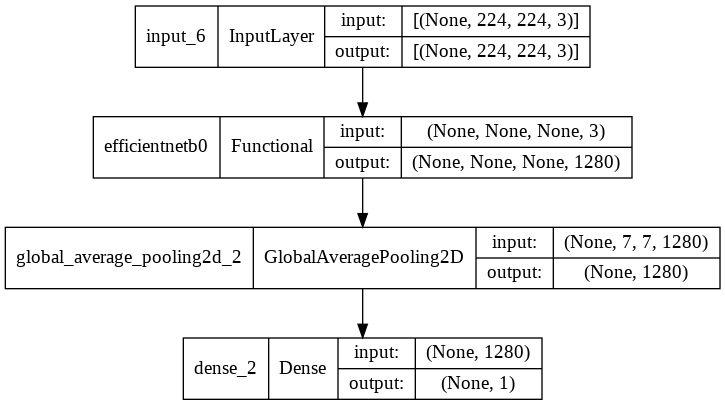

In [ ]:

tf.keras.utils.plot_model(model_1,show_shapes=True)

In [ ]:
!pip install wandb
import wandb
wandb.login()
wandb.init(project="Food_not_food",tensorboard=True)  

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_init.py", line 914, in init
    wi.setup(kwargs)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_init.py", line 167, in setup
    wandb.tensorboard.patch()
  File "/usr/local/lib/python3.7/dist-packages/wandb/integration/tensorboard/monkeypatch.py", line 29, in patch
    "Tensorboard already patched, remove sync_tensorboard=True from wandb.init or only call wandb.tensorboard.patch once."
ValueError: Tensorboard already patched, remove sync_tensorboard=True from wandb.init or only call wandb.tensorboard.patch once.
wandb: ERROR Abnormal program exit


Exception: ignored

In [ ]:
total_samples = len(os.listdir(train_dir))
num_food_samples = len(os.listdir(os.path.join(train_dir, "food_images")))
num_non_food_samples = len(os.listdir(os.path.join(train_dir, "non_food_images")))
total_samples, num_food_samples, num_non_food_samples

(1 / num_food_samples) * (total_samples / 2.0), (1 / num_non_food_samples) * (total_samples / 2.0)

weight_for_0 = (1 / num_food_samples) * (total_samples / 2.0)
weight_for_1 = (1 / num_non_food_samples) * (total_samples / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}


In [ ]:

print(f'Weight for class 0: {weight_for_0}')
print(f'Weight for class 1: {weight_for_1}')

In [ ]:
wandb.init(sync_tensorboard=True)
history_1 = model_1.fit(train_data,
                    epochs=5,
                    validation_data=test_data,
                    callbacks=[early_stopping,
                    create_tensorboard_callback("logs", model_1.name)],
                        class_weight=class_weight)

In [ ]:
model_1.save("food_not_food_model_v1")

In [ ]:
# Convert the model
saved_model_dir = "food_not_food_model_v1"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('food_not_food_model_v1.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')


In [ ]:
cd /content/food-not-food

/content/food-not-food


In [ ]:
!pip install tflite_model_maker
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('INFO')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

     |████████████████████████████████| 591 kB 5.2 MB/s 
     |████████████████████████████████| 213 kB 47.9 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 103 kB 41.2 MB/s 
     |████████████████████████████████| 840 kB 34.1 MB/s 
     |████████████████████████████████| 1.2 MB 36.3 MB/s 
     |████████████████████████████████| 596 kB 38.7 MB/s 
     |████████████████████████████████| 1.1 MB 32.8 MB/s 
     |████████████████████████████████| 120 kB 42.5 MB/s 
     |████████████████████████████████| 1.1 MB 35.7 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 6.3 MB 31.1 MB/s 
     |████████████████████████████████| 99 kB 6.4 MB/s 
     |████████████████████████████████| 352 kB 48.4 MB/s 
     |████████████████████████████████| 47.6 MB 45.6 MB/s 
     |████████████████████████████████| 208 kB 38.7 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943

In [ ]:
train_data_path = "data/train"
test_data_path = "data/test"

import os
class_names = sorted(os.listdir(train_data_path))
class_names

['food_images', 'non_food_images']

In [ ]:
train_data = DataLoader.from_folder(train_data_path)
test_data = DataLoader.from_folder(test_data_path)

train_data, test_data

INFO:tensorflow:Load image with size: 74428, num_label: 2, labels: food_images, non_food_images.
INFO:tensorflow:Load image with size: 18630, num_label: 2, labels: food_images, non_food_images.


(<tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7f95f1581a50>,
 <tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7f95e7a0bc90>)

In [ ]:
model = image_classifier.create(train_data)


INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
2325/2325 [==============================] - 683s 289ms/step - loss: 0.3364 - accuracy: 0.9307
Epoch 2/5
2325/2325 [==============================] - 635s 273ms/step - loss: 0.3281 - accuracy: 0.9348
Epoch 3/5
2325/2325 [==============================] - 641s 276ms/step - loss: 0.3275 - accuracy: 0.9344
Epoch 4/5
2325/2325 [==============================] - 637s 274ms/step - loss: 0.3274 - accuracy: 0.9346
Epoch 5/5
2325/2325 [==============================] - 641s 276ms/step - loss: 0.3271 - accuracy: 0.9346


In [ ]:
model.export(export_dir=".")


INFO:tensorflow:Assets written to: /tmp/tmpa0k6o9gv/assets


INFO:tensorflow:Assets written to: /tmp/tmpa0k6o9gv/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpokyyc_au/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpokyyc_au/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
pip install tflite-model-maker-nightly


     |████████████████████████████████| 617 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 33.9 MB/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 462 kB 44.2 MB/s 
     |████████████████████████████████| 3.4 MB 36.2 MB/s 
     |████████████████████████████████| 25.3 MB 8.8 MB/s 
     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 5.6 MB 41.9 MB/s 
     |████████████████████████████████| 1.3 MB 23.7 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=8dc4fcb9e74afdee8749e9de45bad53ba8d6c67a8b024717ebaaec44ce0f7a49
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68717 sha256=aa4823520bd590e6ae82f1c75ac3ae40d9237e1e865afb993ab3eb21c28784d9
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/nutrify/main/images/sample-food-images/chicken_wings.jpeg


--2021-11-25 03:05:50--  https://raw.githubusercontent.com/mrdbourke/nutrify/main/images/sample-food-images/chicken_wings.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454017 (443K) [image/jpeg]
Saving to: ‘chicken_wings.jpeg’

chicken_wings.jpeg  100%[===================>] 443.38K  --.-KB/s    in 0.03s   

2021-11-25 03:05:50 (12.8 MB/s) - ‘chicken_wings.jpeg’ saved [454017/454017]



In [ ]:
# Load image
image = tf.keras.utils.load_img("truck.jpg")
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = tf.image.resize(input_arr, size=(224, 224)) / 255. # normalize pixels
preds = model.predict_top_k(input_arr, k=2, batch_size=1)
preds[0]

[('non_food_images', 0.93397474), ('food_images', 0.066025294)]

In [ ]:
loss,accuracy=model.evaluate(test_data)

In [ ]:
model.evaluate_tflite('model.tflite', test_data)
